贝叶斯回归

现在考虑一个例子，例中我们拥有围绕 条直线的有噪声数据

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Generate linear artificial data


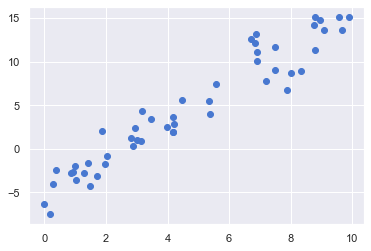

In [51]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + 2*rng.randn(50)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)

In [52]:
import pymc3 as pm
print('Running on the PyMC3 v{}'.format(pm.__version__))
basic_model =  pm.Model()

Running on the PyMC3 v3.9.3


In [53]:
with basic_model as bm:

    #Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Deterministics
    mu = alpha + beta*x
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sd=sigma, observed=y)

In [54]:
 trace = pm.sample(draws=2000,model=bm)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 244 seconds.


<Figure size 576x576 with 0 Axes>

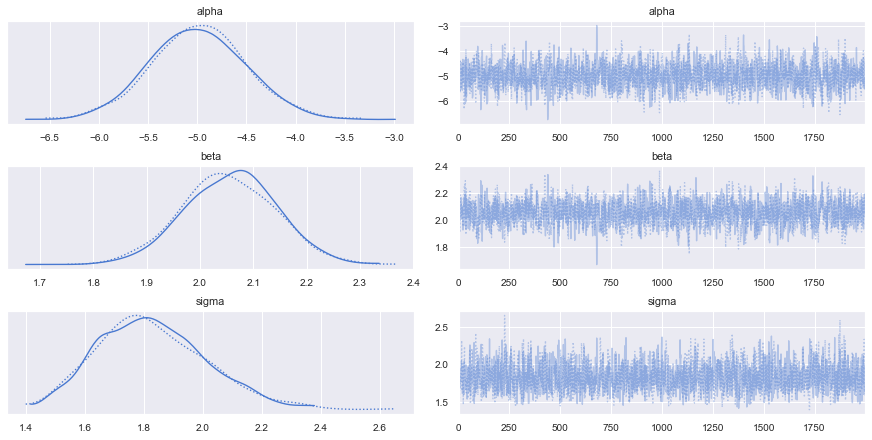

<Figure size 576x576 with 0 Axes>

In [61]:
fig = pm.traceplot(trace, lines={'alpha': -5, 'beta':20, 'sigma': 2})
plt.figure(figsize=(8, 8)) 

In [62]:
print(pm.summary(trace).round(2))

       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha -4.99  0.48   -5.89    -4.07       0.01     0.01    1624.0  1624.0   
beta   2.05  0.09    1.89     2.21       0.00     0.00    1563.0  1563.0   
sigma  1.83  0.18    1.51     2.17       0.00     0.00    1849.0  1849.0   

       ess_bulk  ess_tail  r_hat  
alpha    1626.0    1756.0    1.0  
beta     1564.0    1702.0    1.0  
sigma    1789.0    1708.0    1.0  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A8D07EF08>,
      dtype=object)

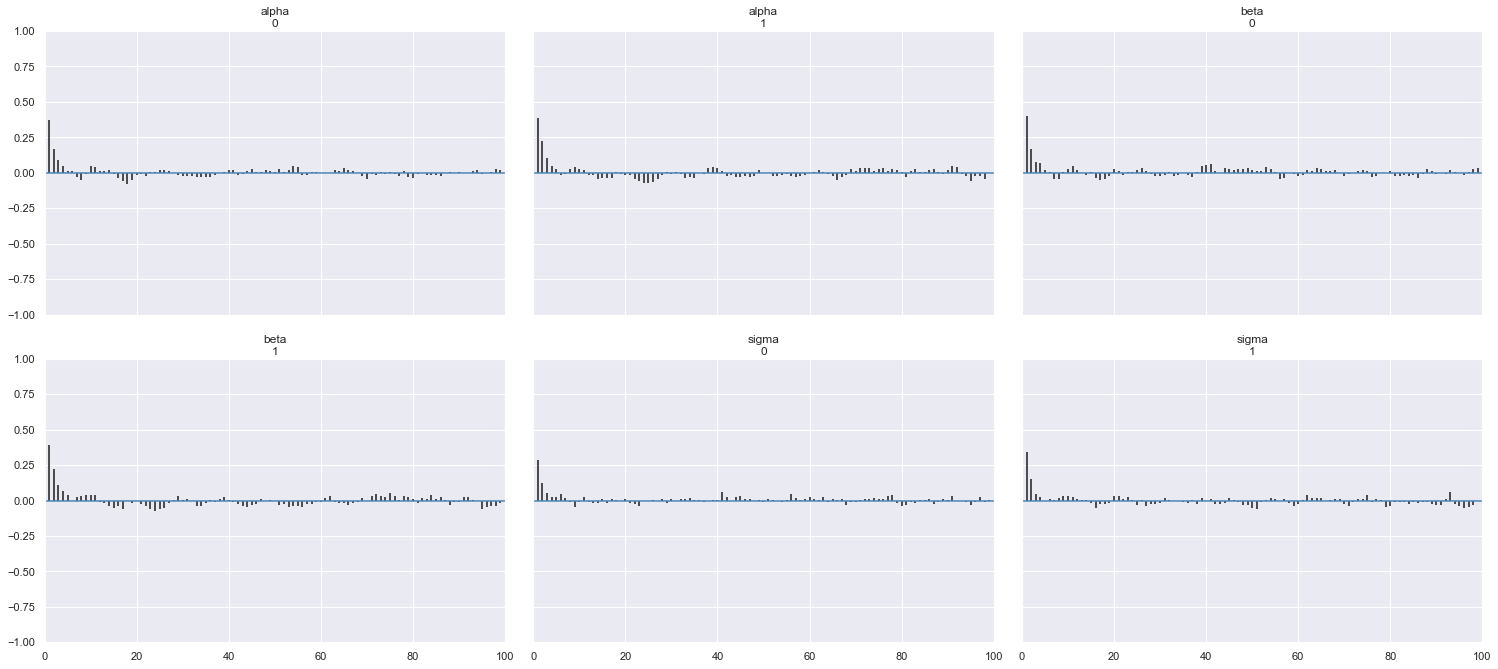

In [63]:
pm.autocorrplot(trace)

Comparing parameters with Simple Linear Regression (OLS)

No handles with labels found to put in legend.


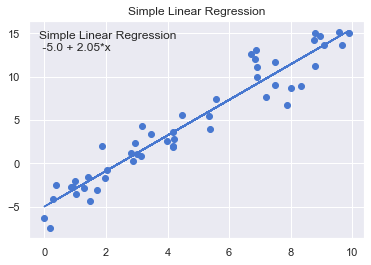

In [64]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
ypred =  lm.fit(x,y).predict(x)
plt.scatter(x,y)
plt.plot(x,ypred)
legend_title = 'Simple Linear Regression\n {} + {}*x'.format(round(lm.intercept_[0],2),round(lm.coef_[0][0],2))
legend = plt.legend(loc='upper left', frameon=False, title=legend_title)
plt.title("Simple Linear Regression")
plt.show()


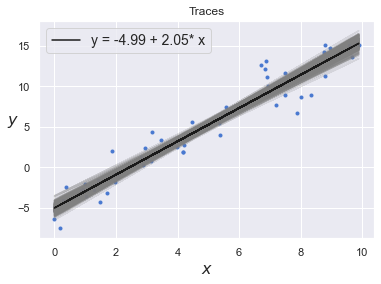

In [65]:
plt.plot(x, y, 'b.');

idx = range(0, len(trace['alpha']), 10)
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()

plt.plot(x, trace['alpha'][idx] + trace['beta'][idx] *x, c='gray', alpha=0.2);
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f}* x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.title("Traces")
plt.show()